# Illustrations of Phonlab library

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import librosa
import numpy as np
import seaborn as sns
import parselmouth
from IPython.display import Audio
import importlib

cwd = os.getcwd()
sys.path.insert(0, os.path.abspath(os.path.dirname(cwd)))

import phonlab as phon

importlib.reload(phon)

print(phon.__name__,phon.__version__)

phonlab 0.0.20


In [2]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'stereo.wav'

# --------
ret = phon.loadsig(example_file)  # taking just the left channel
fs_orig = ret.pop()
x = ret[0]

# or you can say 

*chans, fs_orig = phon.loadsig(example_file)
x = chans[0]

# or you can say 

x, fs_orig = phon.loadsig(example_file, chansel=[0])

# --------

y,fs = phon.prep_audio(x,fs_orig,outtype='int')
print(np.max(y))

y,fs = phon.prep_audio(x,fs_orig,outtype='float')
print(np.max(y))

Resampling from 48000 to 22050
32439
Resampling from 48000 to 22050
0.99


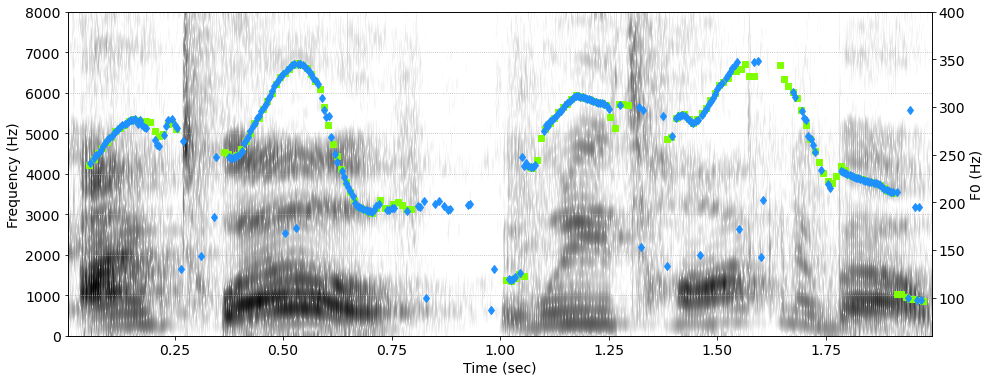

In [9]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'stereo.wav'

x,fs = phon.loadsig(example_file, chansel=[0])
f0_range = [60,400]

f0df = phon.get_f0_acd(x,fs,prom=18)

snd = parselmouth.Sound(str(example_file)).extract_left_channel()  # create a Praat Sound object
pitch = snd.to_pitch()  # create a Praat pitch object
f0df2 = phon.pitch_to_df(pitch)  # convert it into a Pandas dataframe

ret = phon.sgram(x,fs,cmap='Grays') # draw a spectrogram of the sound

ax1 = ret[0]  # get the plot axis
ax2 = ax1.twinx()  # and twin it for plotting f0
ax2.plot(f0df2.sec,f0df2.f0, color='chartreuse',marker="s",linestyle = "none")
ax2.plot(f0df.sec,f0df.f0, color='dodgerblue',marker="d",linestyle = "none")  
ax2.set_ylim(f0_range)
ax2.set_ylabel("F0 (Hz)", size=14)
for item in ax2.get_yticklabels(): item.set_fontsize(14)

In [4]:
f0df3

sec  f0        rms     c
0    0.020 NaN -89.272171  3.40
1    0.025 NaN -88.043655  3.00
2    0.030 NaN -88.503807  3.60
3    0.035 NaN -90.525864  3.60
4    0.040 NaN -91.433784  3.80
..     ...  ..        ...   ...
483  2.435 NaN -83.677208  4.00
484  2.440 NaN -85.420570  4.50
485  2.445 NaN -85.756721  4.25
486  2.450 NaN -85.534225  3.60
487  2.455 NaN -84.825905  3.75

[488 rows x 4 columns]

regular smoothing factor = 11.704, robust smoothing factor = 3.269


Text(0.5, 1.0, 'Robust Smoothing')

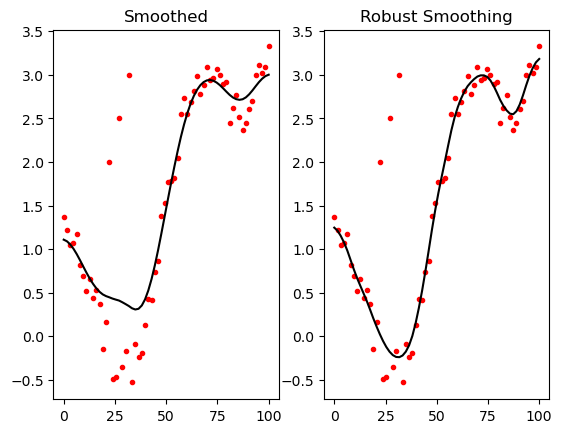

In [5]:
# 1-D example
x = np.linspace(0,100,2**6);
y = np.cos(x/10)+(x/50)**2 + np.random.random_sample(len(x))/2;
y[[14, 17, 20]] = [2, 2.5, 3];

z,s,e = phon.smoothn(y); # Regular smoothing
zr,sr,e = phon.smoothn(y,isrobust=True); # Robust smoothing

print(f'regular smoothing factor = {s:.3f}, robust smoothing factor = {sr:.3f}')

plt.subplot(121), 
plt.plot(x,y,'r.')
plt.plot(x,z,'k')
plt.title("Smoothed")

plt.subplot(122)
plt.plot(x,y,'r.')
plt.plot(x,zr,'k')
plt.title("Robust Smoothing")


## phon.track_formants()

Python native code implements both LPC and Inverse Filter Control (IFC) vowel formant tracking. 

IFC doesn't care if the waveform format is float or int

IFC_tracking(), using method ifc, with speaker set to 2, and pitch range [60, 350]
Resampling from 16000 to 12000
 done         


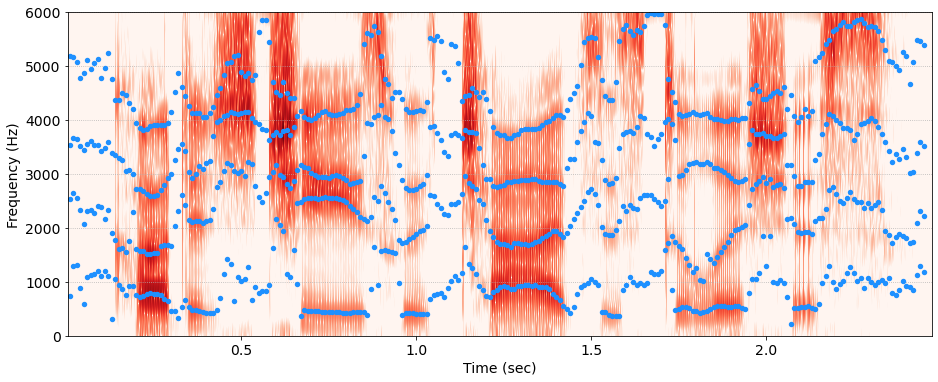

In [16]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'sf3_cln.wav'
x,fs = phon.loadsig(example_file, chansel=[0])
fmtsdf = phon.track_formants(x, fs, method='ifc',speaker=2,f0_range=[60,350])

ret = phon.sgram(x,fs, tf=6000, cmap="Reds")  # plot the spectrogram

dot_color = "dodgerblue"
sns.pointplot(fmtsdf,x='sec',y='F1',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtsdf,x='sec',y='F2',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtsdf,x='sec',y='F3',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtsdf,x='sec',y='F4',linestyle='none',native_scale=True,marker=".",color=dot_color)

fmtsdf.head()
fmtsdf.to_csv("sf3_cln.csv",index=False)

In [13]:
VTL = phon.get_deltaF(fmtsdf, return_value="VTL")
deltaF = phon.get_deltaF(fmtsdf)
print(f'deltaF = {deltaF:.0f}, vocal tract length is {VTL:.2f}')


phon.deltaF_norm(fmtsdf,deltaF = deltaF)
fmtsdf.head()

deltaF = 1210, vocal tract length is 14.58


sec        rms        F1        F2        F3        F4       f0      c  \
0  0.01 -61.888317   622.323  1673.715  2672.961  3377.777  103.448  0.371   
1  0.02 -64.385788   703.271  1758.419  2743.478  3482.697  162.162  0.514   
2  0.03 -65.342529  1099.558  1859.564  2681.426  3462.203  111.111  0.483   
3  0.04 -62.207226   594.623  1707.832  2655.037  3468.141  300.000  0.477   
4  0.05 -60.010612   571.223  1793.733  2623.032  3481.002   98.361  0.532   

      F1/∆F     F2/∆F     F3/∆F     F4/∆F       deltaF  
0  0.514152  1.382792  2.208351  2.790656  1210.387986  
1  0.581029  1.452773  2.266610  2.877339  1210.387986  
2  0.908434  1.536337  2.215344  2.860408  1210.387986  
3  0.491266  1.410979  2.193542  2.865313  1210.387986  
4  0.471934  1.481949  2.167100  2.875939  1210.387986

## phon.sgram()

Makes a pretty good looking spectrogram

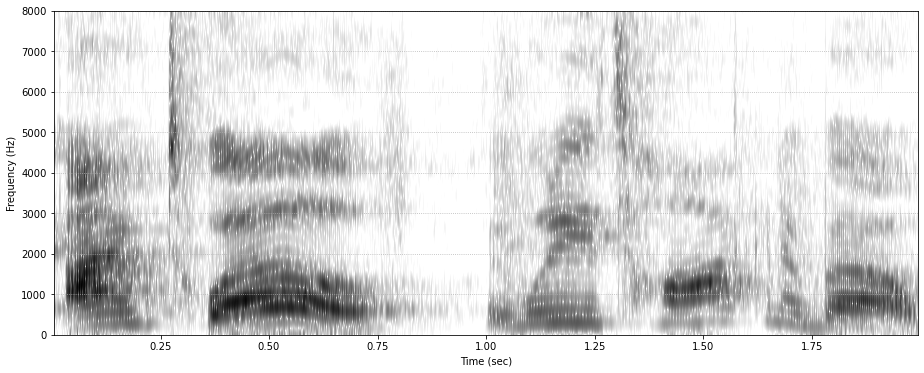

In [4]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'stereo.wav'

x,fs = phon.loadsig(example_file, chansel=[0])
phon.sgram(x,fs)

#Audio(example_file)
Audio(x,rate=fs)

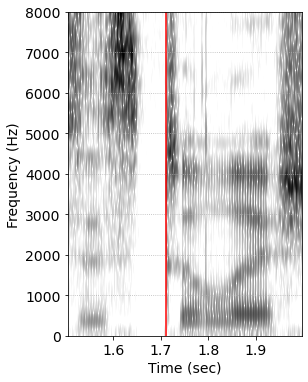

In [18]:
example_file = importlib.resources.files('phonlab') / 'data/example_audio/sf3_cln.wav'
x,fs = phon.loadsig(example_file,chansel=[0])
phon.sgram(x,fs,start=1.5, end=2.0)
plt.axvline(1.71,color="red")

### phon.formant2df

One of the **Tidypraat** routines working with parselmouth to call Praat functions in python

sec          F1           F2           F3           F4
0  0.027187  689.351534  1278.692293  2368.521702  3827.620563
1  0.033437  854.791914  1281.970660  2523.518197  3770.162907
2  0.039687  904.327993  1281.020271  2579.691875  3773.183307
3  0.045937  948.427004  1298.713749  2555.204348  3777.036536
4  0.052187  939.872437  1323.038408  2472.017624  3748.192314

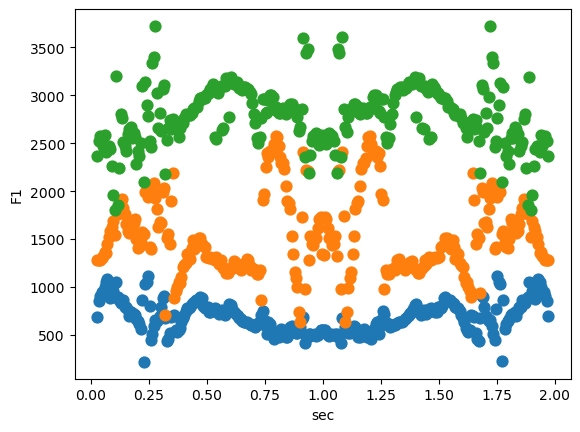

In [6]:
snd = parselmouth.Sound(str(example_file))  # create a Praat Sound object
maxf = 5500       # use 5000 for men, 6000 for women, 8000 for children
fmnt = snd.to_formant_burg(maximum_formant=maxf)  # create a Praat Formant object
fmntdf = phon.formant2df(fmnt, 4, include_bw=False)  # convert it into a Pandas dataframe

sns.pointplot(fmntdf,x='sec',y='F1',linestyle='none',native_scale=True)
sns.pointplot(fmntdf,x='sec',y='F2',linestyle='none',native_scale=True)
sns.pointplot(fmntdf,x='sec',y='F3',linestyle='none',native_scale=True)

fmntdf.head()

## phon.amplitude_envelope()

Here's an intersting application of one of the phonab functions.  Get the amplitude envelope in a low frequency band, and then in a high frequency band.  The difference between them (plotted in red over the spectrogram below) segments the speech into consonant and vowel regions.  Above zero is 'vocalic' and below zero is 'consonantal'.

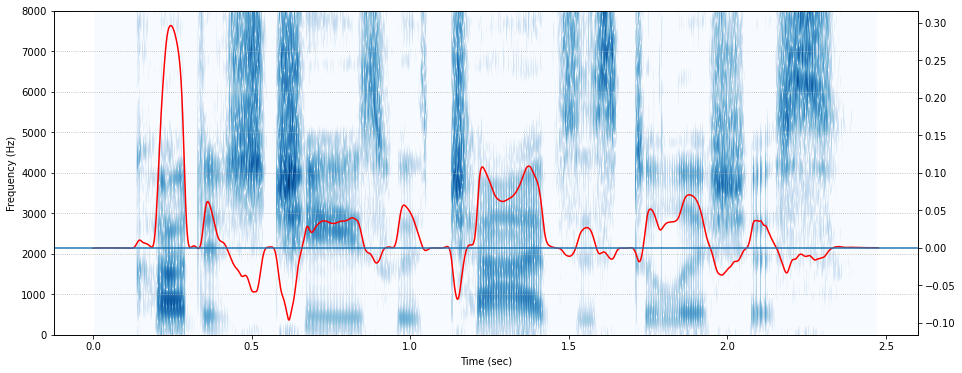

In [7]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'sf3_cln.wav'

x,fs = phon.loadsig(example_file, chansel=[0])
y=np.copy(x)

lband, fs_diff = phon.amplitude_envelope(y,fs,bounds=[120,3000],target_fs=12000)
hband, fs_diff = phon.amplitude_envelope(y,fs,bounds=[3000,5999],target_fs=12000)

diff = lband-hband  # the difference in the low and high envelopes
time_axis = np.arange(len(diff))/fs_diff  # a time axis for envelope plotting

ax1,f,t,Sxx = phon.sgram(x,fs,cmap='Blues') # draw the spectrogram from the array of samples

ax2 = ax1.twinx()
ax2.plot(time_axis,diff, color = "red")  # add scaled diff function
ax2.axhline(0) 

Audio(example_file)

### Vocalic

This code block uses the diff[] array plotted above to define a **vocalic** feature, 
and then uses that feature to clean up the formant plot.  This is really only needed for 
nice looking graphs.  Illustrating here the three main formant tracking algorithms.

IFC_tracking(), using method ifc, with speaker set to 2, and pitch range [63, 400]
Resampling from 16000 to 12000
 done         


<Axes: xlabel='Time (sec)', ylabel='Frequency (Hz)'>

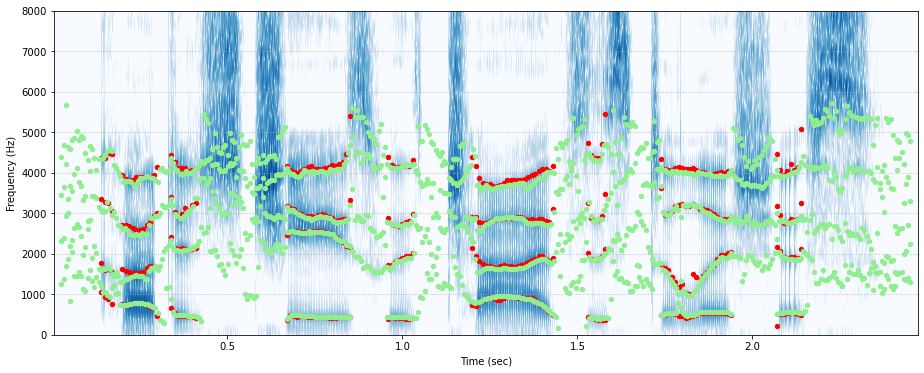

In [8]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'sf3_cln.wav'

# 1) IFC formant tracking
x,fs = phon.loadsig(example_file, chansel=[0])

# 2) Python native LPC formant tracking
fmtsdf = phon.track_formants(x,fs,method='ifc',order = 10, speaker=2)

# 3) Praat LPC formant tracking
snd = parselmouth.Sound(str(example_file))  # create a Praat Sound object
maxf = 6000       # use 5000 for men, 6000 for women, 8000 for children
fmnt = snd.to_formant_burg(maximum_formant=maxf)  # create a Praat Formant object
fmtdf = phon.formant2df(fmnt, 4, include_bw=False)  # convert it into a Pandas dataframe

# ------ use "vocalic" to decide which formant measurements to draw --------  # note pre=0 is important here
lband, fs_diff = phon.amplitude_envelope(x,fs,bounds=[120,3000],target_fs=12000)
hband, fs_diff = phon.amplitude_envelope(x,fs,bounds=[3000,5999],target_fs=12000)
diff = lband-hband  # the difference in the low and high envelopes
fmtsdf["vocalic"] = diff[(fmtsdf['sec']*fs_diff).astype(int)]>0.005  # add 'vocalic' to the dataframe
fmtsdf.loc[fmtsdf["vocalic"] == False, ("F1","F2","F3","F4")] = np.nan # ignore nonvocalic formants

phon.sgram(x,fs, cmap="Blues")  # plot the spectrogram

# add formant dots to the spectrogram
dot_color = "red"
sns.pointplot(fmtsdf,x='sec',y='F1',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtsdf,x='sec',y='F2',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtsdf,x='sec',y='F3',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtsdf,x='sec',y='F4',linestyle='none',native_scale=True,marker=".",color=dot_color)

dot_color = "lightgreen"
sns.pointplot(fmtdf,x='sec',y='F1',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtdf,x='sec',y='F2',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtdf,x='sec',y='F3',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtdf,x='sec',y='F4',linestyle='none',native_scale=True,marker=".",color=dot_color)

## phon.fricative()

Implements both major peak analysis and moments analysis.  The spectrum at time 0.635 (the 'ch' in 'cheese') illustrates that the "major peak" is the first well separated peak, not the point of maximum amplitude in the spectrum.

first major peak at 1600.0, Center of Gravity is 2698.3


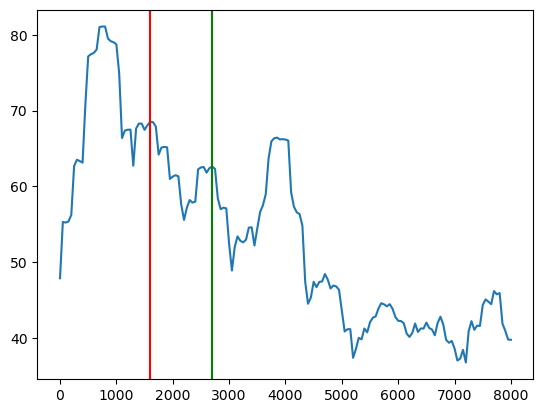

In [9]:
x,fs = phon.loadsig(example_file, chansel=[0], rate=None)
x,fs = phon.prep_audio(x,fs, pre=1, target_fs=16000, outtype = 'int')

Fm,FmB,Am,mode,COG,SD,Skew,Kurtosis,spec,freq = phon.fricative(x,fs,0.27)

print(f"first major peak at {Fm:.1f}, Center of Gravity is {COG:.1f}")
plt.plot(freq,spec)
plt.axvline(Fm,color="red")
plt.axvline(COG,color="green")

## phon.burst()

Resampling from 48000 to 22050
the stop release burst is at time: 0.269 seconds


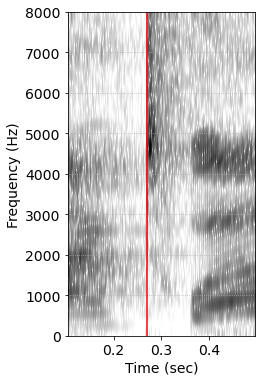

In [20]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'im_twelve.wav'

x,fs = phon.loadsig(example_file, chansel=[0])  
x,fs = phon.prep_audio(x,fs, pre=0.94) # add preemphasis, resample to 22050, ensure correct polarity, and scale to use maximum range

t1 = 0.1
t2 = 0.5

b_time, b_score = phon.burst(x,fs, t1,t2)  # find a stop burst in the span from t1 to t2
print(f"the stop release burst is at time: {b_time:.3f} seconds")
 
ax1,f,t,Sxx = phon.sgram(x,fs,start=t1, end=t2)
ax1.axvline(b_time,color="red")


## phon.egg_to_oq()

With a stereo audio file having audio in the left (channel 0) and electroglottography in the right (channel 1),
this function returns a time axis, f0, and open quotient.


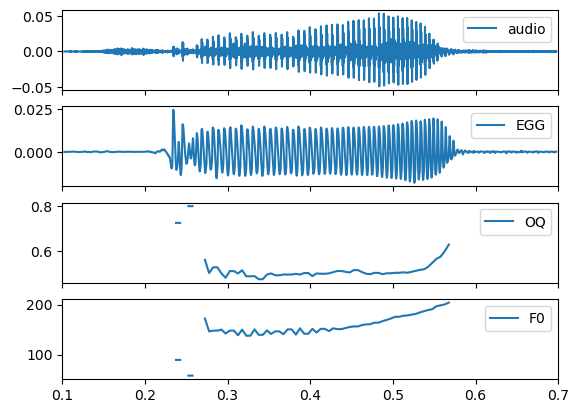

In [11]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'F1_bha24_1.wav'

egg,audio,fs = phon.loadsig(example_file, chansel=[1,0])  
oqdf = phon.egg_to_oq(egg,fs)  # return open quotient data

# ------ The rest of this example is making a nice plot ---------

time = [i/fs for i in range(audio.size)]  # the times of the audio samples.

start_time = 0.1
end_time = start_time + 0.6

sf = np.abs(oqdf.sec - start_time).argmin()  # closest frame to start_time
ef = np.abs(oqdf.sec - end_time).argmin()      # closest frame to end_time

si = int(oqdf.sec.iloc[sf]*fs)  # index of those frame times
ei = int(oqdf.sec.iloc[ef]*fs)    # in the audio and egg signals

fig = plt.figure()
ax1 =fig.add_subplot(411)
ax1.plot(time[si:ei],audio[si:ei],label="audio")
ax1.set_xlim(start_time,end_time)
ax1.set_xticklabels(([]))
ax1.legend()

ax2 =fig.add_subplot(412,sharex=ax1)
ax2.plot(time[si:ei],egg[si:ei],label="EGG")
ax2.legend()

ax3 =fig.add_subplot(413,sharex=ax1)
ax3.plot(oqdf.sec.iloc[sf:ef],oqdf.OQ.iloc[sf:ef],label="OQ")
ax3.legend()

ax4 =fig.add_subplot(414)
ax4.plot(oqdf.sec.iloc[sf:ef],oqdf.f0.iloc[sf:ef],label="F0")
ax4.set_xlim(start_time,end_time)
ax4.legend()


## phon.sine_synth()

With a formants data frame from phon.track_formants(), sine_synth() produces sine wave analogs of speech.

LPC_tracking(), with order set to -1, and pitch range [63, 400]
Resampling from 16000 to 12000
Selected LPC order is: 10


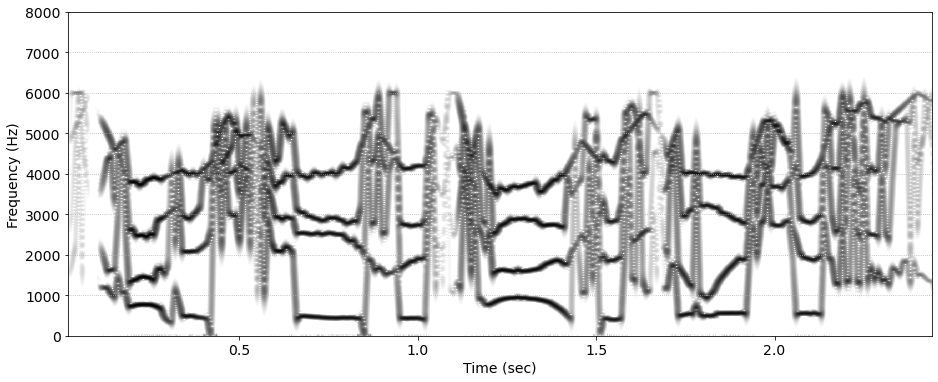

In [24]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'sf3_cln.wav'

x,fs = phon.loadsig(example_file)   # illustrating here that we can pass an array to track_formants()
fmtsdf = phon.track_formants(x,fs)    # track the formants

x2,fs2 = phon.sine_synth(fmtsdf)     # use the formants to produce sinewave synthesis
phon.sgram(x2,fs2, band="nb", preemph=0)  # plot a spectrogram of it

Audio(x2,rate=fs2) 

## phon.sigcor_noise()

Replace signal with noise that matches the amplitude envelope of the signal

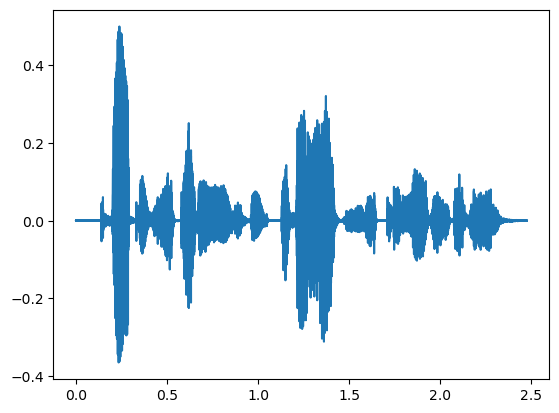

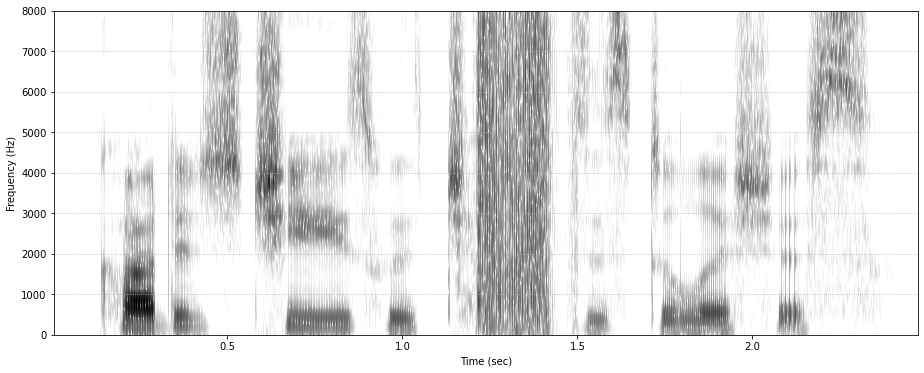

In [13]:
x,fs = phon.loadsig(example_file)   # illustrating here that we can pass an array to track_formants()
y,fs = phon.sigcor_noise(x,fs,flip_rate=0.4,start=1.2,end=1.5)

time_axis = np.arange(len(y))/fs
plt.plot(time_axis,y)  # add_noise pads the signal by 0.5 seconds

phon.sgram(y,fs,preemph=0)
Audio(y,rate=fs) 

## phon.add_noise()

A function that can be used to prepare speech in noise (SPIN) stimuli.


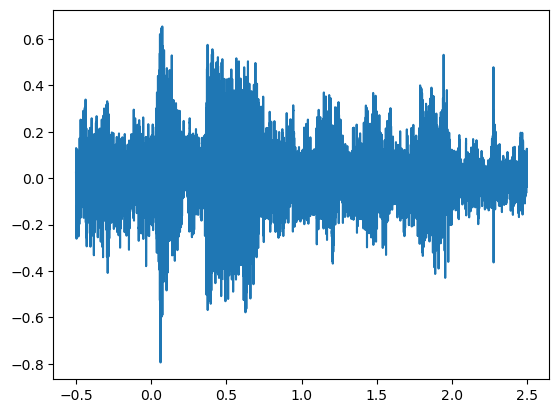

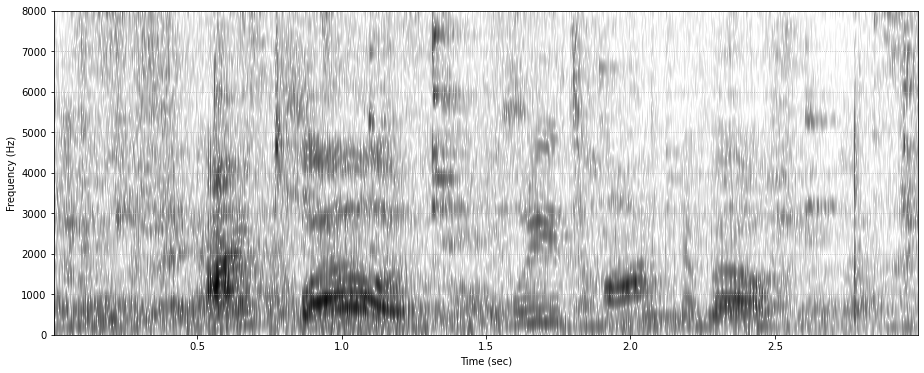

In [14]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'im_twelve.wav'

x,fs = phon.loadsig(example_file)   # illustrating here that we can pass an array to track_formants()
y,fs = phon.add_noise(x,fs,"restaurant",snr=3)
time_axis = np.arange(len(y))/fs

plt.plot(time_axis - 0.5,y)  # add_noise pads the signal by 0.5 seconds
y,fs = phon.prep_audio(y,fs,target_fs=None,pre=0)
phon.sgram(y,fs)
Audio(y,rate=fs) 

## phon.vocode()

Resynthesize speech with noise in frequency bands, simulating the amount of audio information in a cochlear implant.

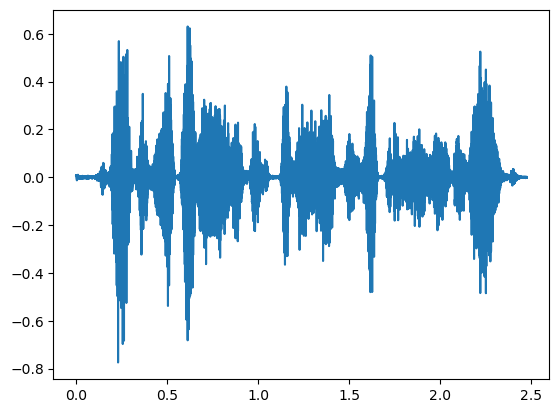

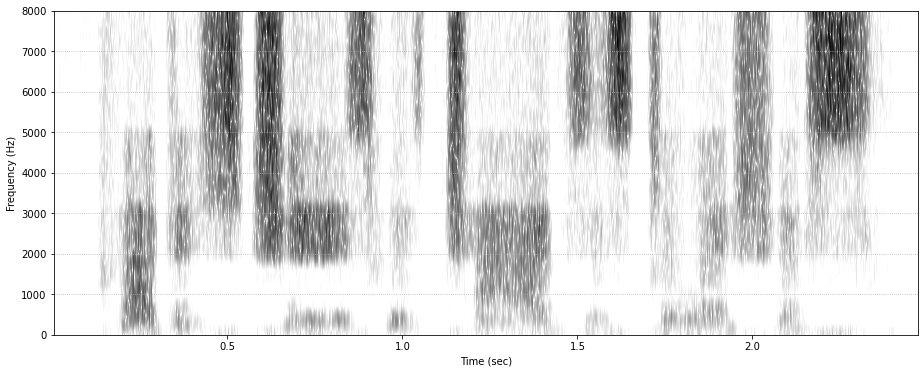

In [15]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'sf3_cln.wav'

bands_third = phon.third_octave_bands(high=8000)  # define filter bank
bands_shan = phon.shannon_bands(high=8000,nc=10)  # define filter bank

x,fs = phon.loadsig(example_file,rate=16000)   
y,fs = phon.vocode(x, fs, bands_shan)  # use one of the filter banks

time_axis = np.arange(len(y))/fs
plt.plot(time_axis,y)

phon.sgram(y,fs)

Audio(y,rate=fs) 

# testing acd f0_tracking

In [631]:
from phonlab import prep_audio
from scipy.signal import windows, find_peaks, spectrogram, peak_prominences
from pandas import DataFrame

def f0_from_harmonics(f_p,i,h,nh):  
    ''' Assign harmonic numbers to the peaks in f_p -- this function is used in get_f0_acd
    
        f_p: an array of peak frequencies
        i: the starting peak to look at (0,n)
        h: the starting harmonic number to assign to this peak (1,n-1)
    '''
    Np = len(f_p)  # number of peaks
    m = np.zeros(Np)
    f0 = []
    m[i] = h
    f0 = np.append(f0, f_p[i]/h)  # f0 if peak i is harmonic h
    thresh = 0.05 * f0[0]  # 5% of the f0 value
    ex = 0  # number of harmonics over h=11

    for j in range(i+1,Np):  # step through the spectral peaks
        lowest_deviation = 1000
        best_f0 = np.nan
        for k in range(h+1,nh+1):  # step through harmonics
            test_f0 = f_p[j]/k
            mean_f0 = np.mean(f0)
            #mean_f0 = np.average(f0,weights=np.arange(len(f0))+1)
            deviation = abs(test_f0 - f0[0])
            if deviation < lowest_deviation: # pick the best harmonic number for this peak
                lowest_deviation = deviation
                best_f0 = test_f0
                best_k = k
        if lowest_deviation < thresh:  # close enough to be a harmonic
            m[j] = best_k
            f0 = np.append(f0,best_f0)
            if (h>11): ex = ex + 1
            h=h+1
    C = ((h-1) + (Np - ex))/ np.count_nonzero(m)

    mean_f0 = np.average(f0,weights=np.arange(len(f0))+1)
    return C,mean_f0 
    
def get_f0_acd(y, fs, f0_range=[60,400], prom=14, min_height = 0.6, test_time=-1):
    """Track the fundamental frequency of voicing (f0)

    The method in this function implements the 'approximate common denominator" algorithm proposed by 
    Aliik, Mihkla and Ross (1984), which was an improvement on the method proposed by Duifuis, 
    Willems and Sluyter (1982).  The method finds candidate harmonic peaks in the spectrum, and chooses 
    a value of f0 that will give the best fitting harmonic pattern.

    Parameters
    ==========
        y : ndarray
            A one-dimensional array of audio samples
        fs : int
            the sampling rateof the audio in **x**.
        prom : numeric, default = 14 dB
            In deciding whether a peak in the spectrum is a possible harmonic, this prominence value is 
passed to scipy.find_peaks().  A larger value means that the spectral peak must be more prominent to be 
considered as a possible harmonic peak, and thus the algorithm is less likely to report a pitch value when 
the parameter is given a high value.  In general, 20 is a high value, and 3 is low.
        f0_range : a list of two integers, default=[60,400]
            The lowest and highest values to consider in pitch tracking (e.g. [60,400]. 
        min_height: numeric, default = 0.6
            As a proportion of the range between the lowest amplitude in the spectrum and the highest, only 
            peaks above `min_height` will be considered to be harmonics. The value that is passed to 
            find_peaks() is: `amplitude_min + min_height*(amplitude_range)`. 

    Returns
    =======
        df - a pandas dataframe  measurements at 0.01 sec intervals.

    Note
    ====
    The columns in the returned dataframe are for each frame of audio:
        * sec - time at the midpoint of each frame
        * f0 - estimate of the fundamental frequency
        * rms - estimate of the rms amplitude in the downsampled spectrum (0-2400 Hz by default)
        * c - spectral fit criterion, smaller means the fit is better

    Example
    =======

    .. code-block:: Python
    
         y,fs = phon.loadsig("sf3_cln.wav",chansel=[0])
         f0df = get_f0_acd(y,fs)
        
         ret = phon.sgram(y, fs, cmap='Blues') # draw the spectrogram from the array of samples
         ax1 = ret[0]  # the first item returned is the matplotlib axes of the spectrogram
         ax2 = ax1.twinx()
         ax2.plot(f0df.sec,f0df.f0, 'go')  

    .. figure:: images/acd_pitch_trace.png
       :scale: 50 %
       :alt: a 'bluescale' spectrogram with a comparison of two pitch traces
       :align: center

       Comparing the f0 found by `phon.get_f0_acd()` plotted with black dots, and the f0 
       values found by `parselmouth` `to_Pitch()`, plotted with magenta dots.

       ..

    """
    nh = 6  # maximum number of harmonics to consider
    down_fs = nh*400  # down sample frequency
    x, fs = prep_audio(y, fs, target_fs = down_fs, pre=0,quiet=True)  # no preemphasis
    
    step_sec = 0.005  # a new pitch estimate every 5 ms
    N = 1024    # FFT size

    frame_len = int(fs*0.04)  # 40 ms frame
    step = int(fs*step_sec)  # stride between frames
    noverlap = frame_len - step   # points of overlap between successive frames

    while (frame_len > N): N = N * 2  # increase fft size if needed
    w = windows.hamming(frame_len)
    f,ts,Sxx = spectrogram(x,fs=fs,noverlap = noverlap, window=w, nperseg = frame_len, 
                              nfft = N, scaling = 'spectrum', mode = 'magnitude', detrend = 'linear')
    rms = 20 * np.log10(np.sqrt(np.divide(np.sum(np.square(Sxx),axis=0),len(f)))) 
    Sxx = 20 * np.log10(Sxx)

    nb = len(ts)  # the number of frames in the spectrogram
    f0 = np.full(nb,np.nan)  # array filled with nan
    h1h2 = np.full(nb,np.nan)        # array filled with 5
        
    min_dist = int(f0_range[0]/(fs/N)) # min distance btw harmonics
    max_dist = int(f0_range[1]/(fs/N))
    dist = int((min_dist + max_dist)/2)

    ## temp
    if test_time>0:
        i_test = np.argmin(np.fabs(test_time-ts)) # the ts that is closest to this
    else: 
        i_test = -1
    ## temp
    
    for idx in range(nb):
        spec = Sxx[:,idx]
         
        height = np.min(spec) + min_height * np.abs(np.max(spec)-np.min(spec))  # required height of a peak
        
        peaks,props = find_peaks(spec, height = height, prominence=prom, distance = min_dist, wlen=dist)

        n=nh  # highest harmonic number
        if len(peaks)<n: n = len(peaks)

        best_c = 5
        peak_diff = np.median(np.ediff1d(f[peaks[0:n]]))  # median difference between adjacent peaks       
        if len(peaks)>2:  # we did find some harmonics?
            for p in range(3):  # for each of the first three spectral peaks
                for h in range(1,5): # treat it as one of the first four harmonics
                    if (h==p*2): break
                    C,_f0 = f0_from_harmonics(f[peaks],p,h,nh)
                    if idx==i_test: print(f'_f0: {_f0:0.1f}, peak: {p}, harmonic: {h}, C: {C:0.2f}')
                    if (C < 3.5)  & (f0_range[0] < _f0) & (_f0 < f0_range[1]) & (C<best_c):
                        best_c = C      
                        i_f0 = np.argmin(np.fabs(_f0 - f)) # the f that is closest to f0
                        i_2f0 = np.argmin(np.fabs((2 * _f0) - f)) # the f that is closest to 2f0
                        h1h2[idx] = spec[i_f0] - spec[i_2f0]
                        f0[idx] = _f0

        
        if idx==i_test:  # diagnostic info, only at a target frame
            plt.plot(f,spec)
            plt.vlines(f[peaks[0:n]],np.min(spec),np.max(spec))
            plt.axhline(height)
            print("number of peaks: ",len(peaks), "start time: ", ts[0])
            print(f'min_dist = {min_dist}, max_dist = {max_dist}, down_fs={fs}, len(f)={len(f)}, N={N}')
            print(f"median difference between adjacent peaks {np.median(np.ediff1d(f[peaks[0:n]])):0.2f}")
            print(f"frequency of the lowest peak {f[peaks[0]]:0.2f}")
            print(f'mean prominence: {np.mean(props["prominences"][0:n]):0.3f} mean peak: {np.mean(props["peak_heights"][0:n]):0.3f}')
            print(f"height = {height:0.2f},max={np.max(spec):0.2f}, min={np.min(spec):0.2f}, c={best_c}")
            print(f"time = {test_time}, f0 = {f0[idx]:0.2f}, h1h2 = {h1h2[idx]:0.2f}")

    return DataFrame({'sec': ts, 'f0':f0, 'rms':rms[:nb], 'h1h2':h1h2})

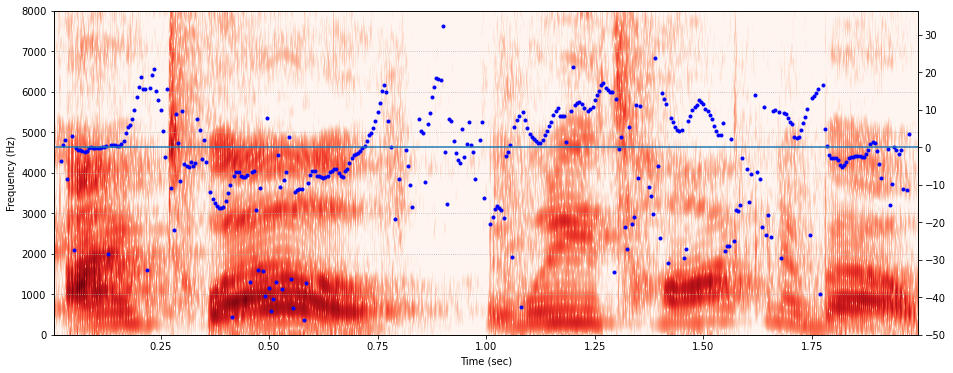

In [648]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'stereo.wav'
x,fs = phon.loadsig(example_file, chansel=[0])

df = get_f0_acd(x,fs,prom=8,min_height=0.5)

ret = phon.sgram(x,fs,cmap="Reds") # draw a spectrogram of the sound
ax2 = ret[0].twinx()  # and twin it for plotting f0
ax2.plot(df.sec,df.h1h2, 'b.')  
ax2.axhline(0)

sec  OQ  f0
0  0.0125 NaN NaN
1  0.0175 NaN NaN
2  0.0225 NaN NaN
3  0.0275 NaN NaN
4  0.0325 NaN NaN